In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing  import StandardScaler as SSc
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.neighbors import KNeighborsClassifier

import scipy.cluster.hierarchy as shc

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import silhouette_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from mpl_toolkits.mplot3d import Axes3D
from yellowbrick.cluster import SilhouetteVisualizer

#Deep Leaning Libraries
!pip install mnist # if you are working on colab otherwise install it directly from conda/python prompt

import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical
import mnist

from __future__ import print_function

import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras.optimizers import Adam

In [ ]:
df=pd.read_csv("bank.csv")

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
df.isnull().sum() #no null values in data

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
#define a function to separate the num and cat columns
def extract_cat_num(df):
  cat_col= [col for col in df.columns if df[col].dtype== 'object']
  num_col= [col for col in df.columns if df[col].dtype!= 'object']
  return cat_col, num_col

In [ ]:
cat_col, num_col= extract_cat_num(df) #run teh function
df_num=df.loc[:,num_col]
df_cat=df.loc[:,cat_col]
"==========The cat columns are:========", cat_col, "==========The num columns are:========", num_col

('==========The cat columns are:========',
 ['job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'poutcome',
  'deposit'],
 '==========The num columns are:========',
 ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'])

In [ ]:
# a function that plots the distribuion, the quartiles and a box plot of the columns numbers from (f) to (t)
def Univariate_analysis(df,f,t):
  # f is  the starting column number
  # t is the column to
  df2=df.describe()
  df2=df2.iloc[1:,:]
  n=t-f #number of columns to diplay
  df2=df2.iloc[:,f:t]
  i=0
  plt.figure(figsize=(50, 25))
  for column in df2:
      i=i+1
      plt.subplot(3, n, i)
      df[column].plot(kind='hist',fontsize=15,color="#63bff0")
      plt.title(column, fontsize=14)
      plt.xticks(rotation=90)
      plt.subplot(3, n, i+n)
      df2[column].plot(kind='bar',fontsize=15,color="#63bff0")
      plt.title(column, fontsize=14)
      plt.xticks(rotation=90)
      plt.subplot(3, n, i+2*n)
      df[column].plot(kind='box',fontsize=15,color="#63bff0")
      plt.title(column, fontsize=14)
      plt.xticks(rotation=90)
  plt.subplots_adjust(left=0.2,
                      bottom=0.2,
                      right=1,
                      top=0.9,
                      wspace=0.3,
                      hspace=0.3)

  plt.style.use('ggplot')
  plt.suptitle('Univariate analysis from {} to {}'.format(f,t), fontsize=40)
  return plt.show()

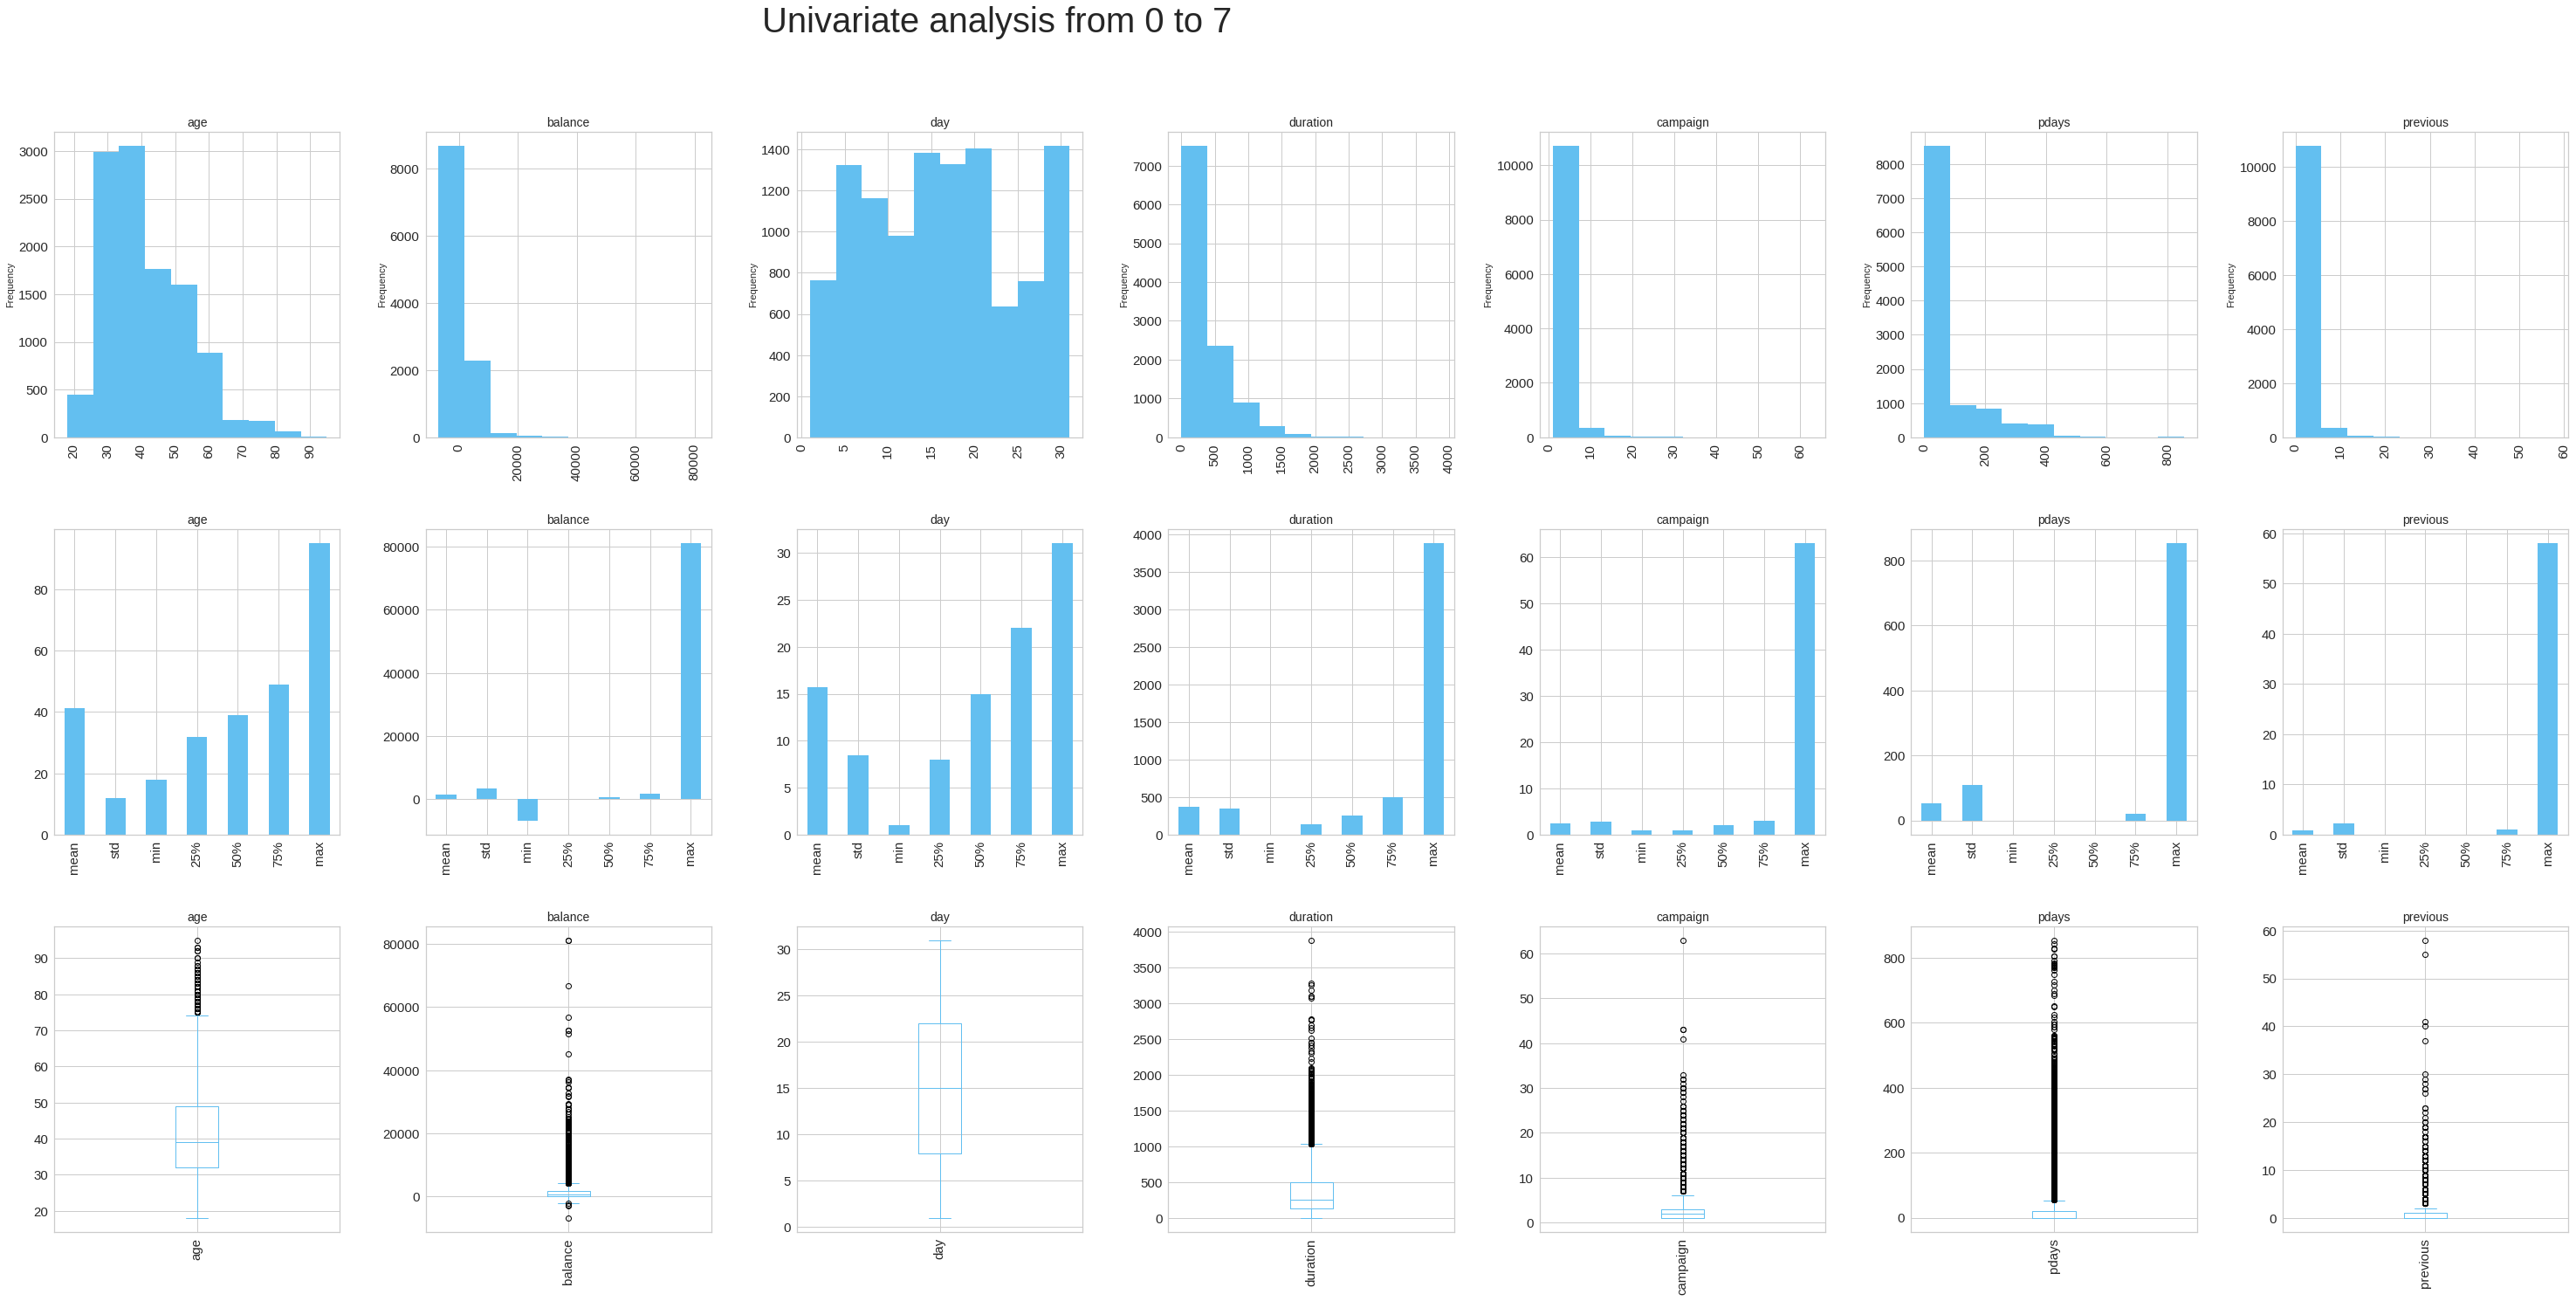

In [ ]:
Univariate_analysis(df,0,7)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

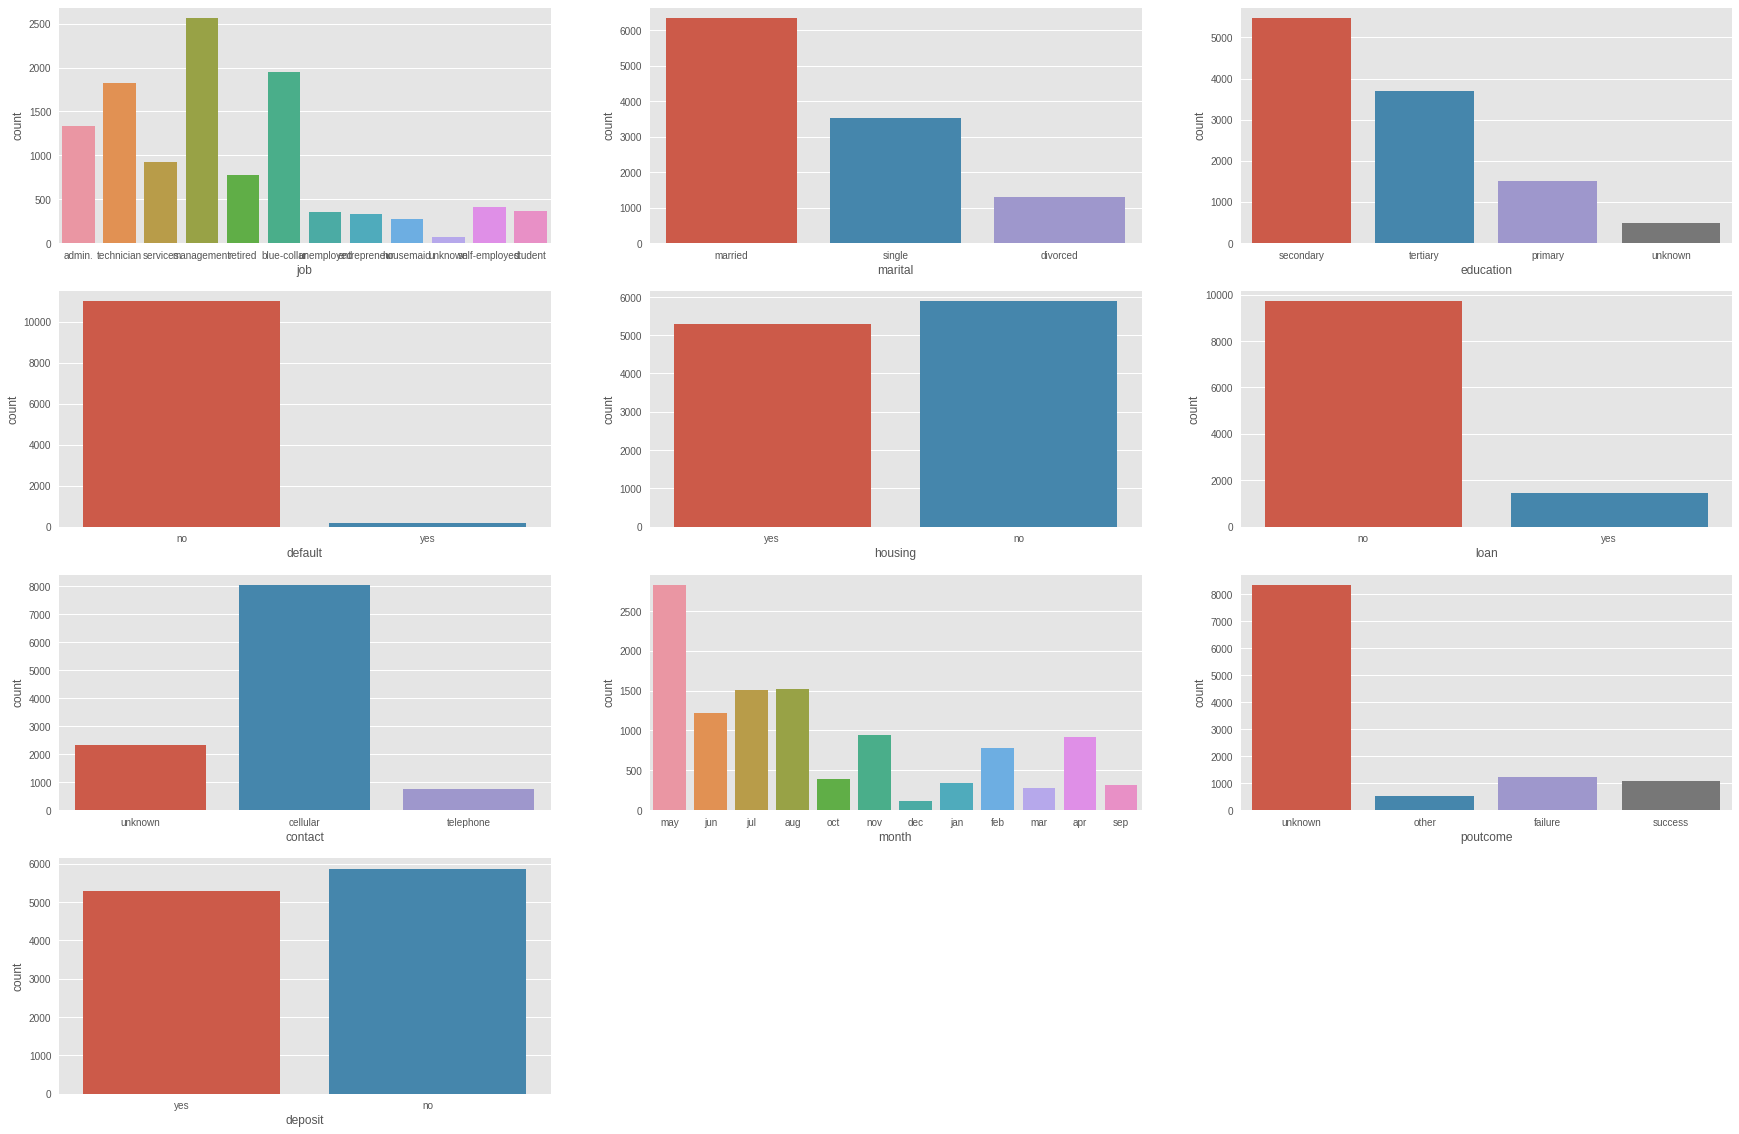

In [ ]:
#overview of the categorical data
len(cat_col)
plt.figure(figsize= (30,20))
for i,feature in enumerate(cat_col):
  plt.subplot(4,3,i+1)
  sns.countplot(df[feature])
plt.show()

In [ ]:
#define a function to separate the num and cat columns
def extract_cat_num(df):
  cat_col= [col for col in df.columns if df[col].dtype== 'object']
  num_col= [col for col in df.columns if df[col].dtype!= 'object']
  return cat_col, num_col
cat_col,num_col=extract_cat_num(df)

In [ ]:
num_col

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [ ]:
X=df[num_col]
X= pd.concat([X,df[cat_col]], axis= 1)
X.drop(columns=['deposit'],inplace=True)

#Target
Y= df['deposit']

In [ ]:
#convert cat variables
le= LabelEncoder()
for col in cat_col:
  df[col]= le.fit_transform(df[col])


In [ ]:
X

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome
0,59,2343,5,1042,1,-1,0,0,1,1,0,1,0,2,8,3
1,56,45,5,1467,1,-1,0,0,1,1,0,0,0,2,8,3
2,41,1270,5,1389,1,-1,0,9,1,1,0,1,0,2,8,3
3,55,2476,5,579,1,-1,0,7,1,1,0,1,0,2,8,3
4,54,184,5,673,2,-1,0,0,1,2,0,0,0,2,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0,1,2,0,0,1,0,0,0,3
11158,39,733,16,83,4,-1,0,7,1,1,0,0,0,2,6,3
11159,32,29,19,156,2,-1,0,9,2,1,0,0,0,0,1,3
11160,43,0,8,9,2,172,5,9,1,1,0,0,1,0,8,0


In [ ]:
Y

0        yes
1        yes
2        yes
3        yes
4        yes
        ... 
11157     no
11158     no
11159     no
11160     no
11161     no
Name: deposit, Length: 11162, dtype: object

In [ ]:
#Standarize Data
#standarizing the numerical columns
scaler =SSc()
scaler.fit(X)
x_sc=scaler.transform(X)
x_sc=pd.DataFrame(x_sc,columns=X.columns)
x_sc.describe()
X=x_sc

In [ ]:
X

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome
0,1.491505,0.252525,-1.265746,1.930226,-0.554168,-0.481184,-0.363260,-1.391604,-0.318672,-0.380501,-0.123617,1.055280,-0.387923,1.844786,0.800268,0.520705
1,1.239676,-0.459974,-1.265746,3.154612,-0.554168,-0.481184,-0.363260,-1.391604,-0.318672,-0.380501,-0.123617,-0.947616,-0.387923,1.844786,0.800268,0.520705
2,-0.019470,-0.080160,-1.265746,2.929901,-0.554168,-0.481184,-0.363260,1.399105,-0.318672,-0.380501,-0.123617,1.055280,-0.387923,1.844786,0.800268,0.520705
3,1.155733,0.293762,-1.265746,0.596366,-0.554168,-0.481184,-0.363260,0.778947,-0.318672,-0.380501,-0.123617,1.055280,-0.387923,1.844786,0.800268,0.520705
4,1.071790,-0.416876,-1.265746,0.867171,-0.186785,-0.481184,-0.363260,-1.391604,-0.318672,0.953822,-0.123617,-0.947616,-0.387923,1.844786,0.800268,0.520705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,-0.691015,-0.473616,0.515650,-0.331287,-0.554168,-0.481184,-0.363260,-1.081525,1.279987,-1.714823,-0.123617,1.055280,-0.387923,-0.598149,-1.706158,0.520705
11158,-0.187357,-0.246658,0.040612,-0.832564,0.547981,-0.481184,-0.363260,0.778947,-0.318672,-0.380501,-0.123617,-0.947616,-0.387923,1.844786,0.173661,0.520705
11159,-0.774958,-0.464934,0.396891,-0.622258,-0.186785,-0.481184,-0.363260,1.399105,1.279987,-0.380501,-0.123617,-0.947616,-0.387923,-0.598149,-1.392855,0.520705
11160,0.148416,-0.473926,-0.909466,-1.045752,-0.186785,1.109571,1.818332,1.399105,-0.318672,-0.380501,-0.123617,-0.947616,2.577830,-0.598149,0.800268,-2.470600


In [ ]:
#split the data
X_train, X_test, y_train,y_test = train_test_split(X, Y, test_size = 0.1)
X_model, X_valid, y_model, y_valid = train_test_split(X_train, y_train, test_size = 0.2)

In [ ]:
n_x = X_train.shape[1]

In [ ]:
num_classes=2

In [ ]:
y_model = keras.utils.to_categorical(y_model, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
#define the Deep NN model
batch_size = 16
epochs = 50

model = Sequential()
model.add(Dense(200, activation='relu', input_shape=(n_x,)))
model.add(Dropout(0.3))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 200)               3400      
                                                                 
 dropout_40 (Dropout)        (None, 200)               0         
                                                                 
 dense_61 (Dense)            (None, 200)               40200     
                                                                 
 dropout_41 (Dropout)        (None, 200)               0         
                                                                 
 dense_62 (Dense)            (None, 2)                 402       
                                                                 
Total params: 44,002
Trainable params: 44,002
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(X_model, y_model,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_valid, y_valid))


Epoch 1/50
440/440 [==============================] - 1s 2ms/step - loss: 28.0896 - accuracy: 0.5890 - val_loss: 3.2845 - val_accuracy: 0.5703
Epoch 2/50
440/440 [==============================] - 1s 2ms/step - loss: 2.6816 - accuracy: 0.6285 - val_loss: 0.6962 - val_accuracy: 0.6138
Epoch 3/50
440/440 [==============================] - 1s 2ms/step - loss: 0.9561 - accuracy: 0.6505 - val_loss: 0.6281 - val_accuracy: 0.6279
Epoch 4/50
440/440 [==============================] - 1s 2ms/step - loss: 0.7163 - accuracy: 0.6592 - val_loss: 0.6015 - val_accuracy: 0.6688
Epoch 5/50
440/440 [==============================] - 1s 2ms/step - loss: 0.6802 - accuracy: 0.6703 - val_loss: 0.6187 - val_accuracy: 0.6560
Epoch 6/50
440/440 [==============================] - 1s 2ms/step - loss: 0.6822 - accuracy: 0.6776 - val_loss: 0.5549 - val_accuracy: 0.7097
Epoch 7/50
440/440 [==============================] - 1s 2ms/step - loss: 0.6372 - accuracy: 0.6736 - val_loss: 0.5765 - val_accuracy: 0.6726
Epoch

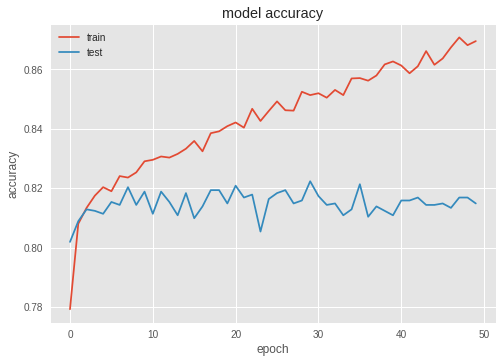

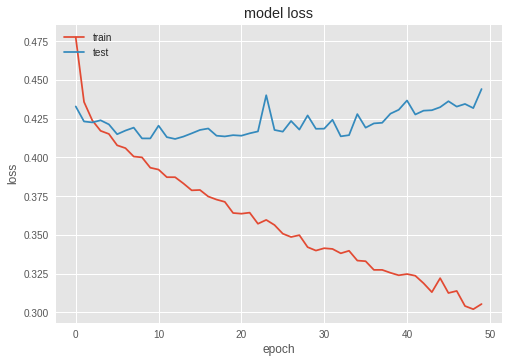

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])
# You should be able to get,at least, 88% accuracy

35/35 [==============================] - 0s 1ms/step - loss: 0.4421 - accuracy: 0.8156
Test accuracy: 0.8155774474143982


In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0


In [ ]:
target = "deposit"
X = df.copy()
del X[target]
X = pd.get_dummies(X, drop_first=True)
y = np.where(df.deposit == 1, 1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                    test_size = 0.3, random_state = 42)

X_model, X_valid, y_model, y_valid = train_test_split(X_train, y_train, test_size = 0.1)

In [ ]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0


In [ ]:
 y_test, y_model, y_valid

(array([0, 1, 1, ..., 0, 0, 1]),
 array([1, 1, 1, ..., 1, 1, 0]),
 array([1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
        1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
        0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
        1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
        1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
        0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
        1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,

In [ ]:
Y

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int64

In [ ]:
scaler = SSc()

X_model_std = scaler.fit_transform(X_model)
X_valid_std = scaler.fit_transform(X_valid)
X_test_std = scaler.transform(X_test)

y_model = keras.utils.to_categorical(y_model, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
X_test_std

array([[-0.84938054, -1.39282635,  1.27358436, ..., -0.48203214,
        -0.35894691,  0.52287872],
       [ 0.15943034, -1.0830671 , -0.32335267, ..., -0.48203214,
        -0.35894691,  0.52287872],
       [-1.26971841, -1.0830671 ,  1.27358436, ..., -0.48203214,
        -0.35894691,  0.52287872],
       ...,
       [-0.51311025, -0.15378934, -0.32335267, ..., -0.48203214,
        -0.35894691,  0.52287872],
       [ 0.49570063,  0.15596991,  1.27358436, ..., -0.48203214,
        -0.35894691,  0.52287872],
       [ 0.07536277, -0.15378934, -1.92028969, ..., -0.48203214,
        -0.35894691,  0.52287872]])

In [ ]:
n_x = X_model.shape[1]
num_classes = 2
batch_size = 32
epochs = 60

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(n_x,)))
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

model.compile(loss= 'categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(X_model_std, y_model,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_valid_std, y_valid))
score = model.evaluate(X_test_std, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 32)                544       
                                                                 
 dropout_38 (Dropout)        (None, 32)                0         
                                                                 
 dense_58 (Dense)            (None, 32)                1056      
                                                                 
 dropout_39 (Dropout)        (None, 32)                0         
                                                                 
 dense_59 (Dense)            (None, 2)                 66        
                                                                 
Total params: 1,666
Trainable params: 1,666
Non-trainable params: 0
_________________________________________________________________
Epoch 1/60
220/220 [==============================]

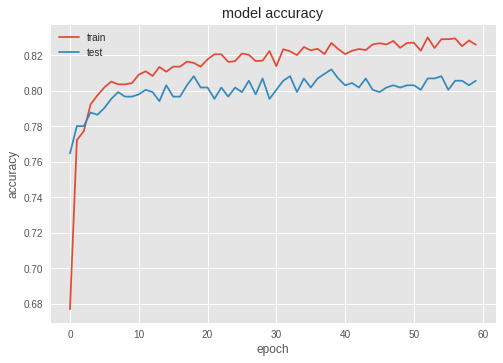

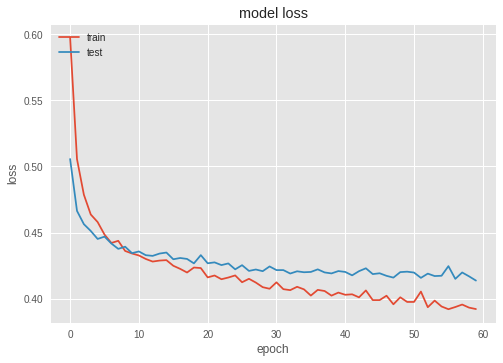

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()